In [83]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [52]:
# Data
data_weight = 0.7
data_bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = data_weight * X + data_bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [53]:
# Split data
split_count = int(0.8 * len(X))
X_train, y_train, X_test, y_test = X[:split_count], y[:split_count], X[split_count:], y[split_count:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [54]:
# Plot
def plot_predictions(X = X_train, y = y_train, X_test = X_test, y_test = y_test, prediction = None):
    plt.scatter(X, y, c="r", s=4, label="Training Data")
    plt.scatter(X_test, y_test, c="b", s=4, label="Testing Data")
    if prediction is not None:
        plt.scatter(X_test, prediction, c="g", s=4, label="Prediction")
    plt.xlabel("Input")
    plt.ylabel("Value")
    plt.legend()

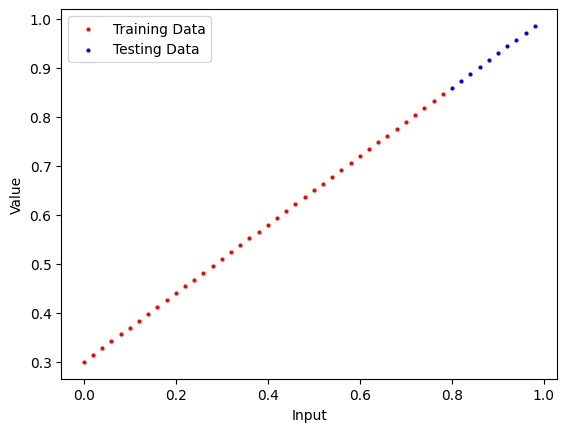

In [55]:
plot_predictions()

In [56]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [57]:
torch.manual_seed(42)

model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [58]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [60]:
epochs = 200

for epoch in range(epochs):
    model_1.train()

    y_preds = model_1(X_train)

    loss = loss_fn(y_preds, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")

Epoch : 0 | Loss : 0.5551779866218567 | Test Loss : 0.5739762187004089
Epoch : 10 | Loss : 0.4399680495262146 | Test Loss : 0.4392663538455963
Epoch : 20 | Loss : 0.3247582018375397 | Test Loss : 0.30455657839775085
Epoch : 30 | Loss : 0.20954827964305878 | Test Loss : 0.16984674334526062
Epoch : 40 | Loss : 0.09433844685554504 | Test Loss : 0.03513689711689949
Epoch : 50 | Loss : 0.023886386305093765 | Test Loss : 0.04784906655550003
Epoch : 60 | Loss : 0.0199567973613739 | Test Loss : 0.04580312222242355
Epoch : 70 | Loss : 0.016517987474799156 | Test Loss : 0.0375305712223053
Epoch : 80 | Loss : 0.013089170679450035 | Test Loss : 0.029944902285933495
Epoch : 90 | Loss : 0.009653178043663502 | Test Loss : 0.02167237363755703
Epoch : 100 | Loss : 0.006215679459273815 | Test Loss : 0.014086711220443249
Epoch : 110 | Loss : 0.002787243574857712 | Test Loss : 0.005814164876937866
Epoch : 120 | Loss : 0.0012645035749301314 | Test Loss : 0.013801807537674904
Epoch : 130 | Loss : 0.00126450

In [72]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

C:\Users\saket\AppData\Local\Temp\ipykernel_20168\1626878021.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_predictions(prediction= np.array(torch.tensor(test_pred)))


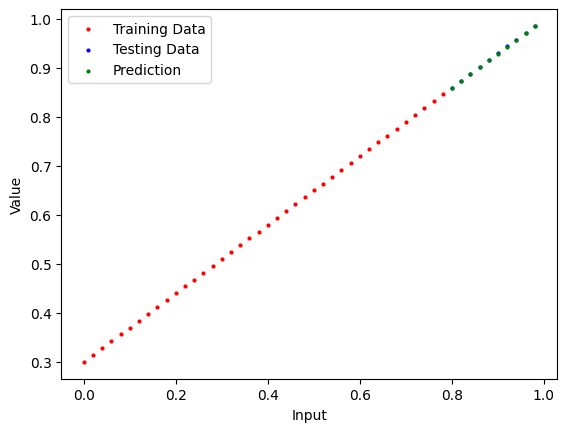

In [75]:
# len(y_preds)
plot_predictions(prediction= np.array(torch.tensor(test_pred)))

In [87]:
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [88]:
# Saving and loading the training model
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

Saving model to : Models\01_model_1.pth


In [92]:
# Load Model

loaded_model_1 = LinearRegressionModel()
loaded_model_1, loaded_model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2191]])),
              ('linear_layer.bias', tensor([0.2018]))]))

In [93]:
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])